### Importing Library and Datasets

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
appledata = pd.read_csv("AppleStore.csv")    #use your own path for the data set
appledata.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [3]:
appledata = appledata[["track_name", "size_bytes", "price", "rating_count_tot","user_rating","cont_rating","prime_genre"]]
appledata.head(10)

,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping
4,Bible,92774400,0.00,985920,4.5,4+,Reference
5,Shanghai Mahjong,10485713,0.99,8253,4.0,4+,Games
6,PayPal - Send and request money safely,227795968,0.00,119487,4.0,4+,Finance
7,Pandora - Music & Radio,130242560,0.00,1126879,4.0,12+,Music
8,PCalc - The Best Calculator,49250304,9.99,1117,4.5,4+,Utilities
9,Ms. PAC-MAN,70023168,3.99,7885,4.0,4+,Games


In [4]:
appledata['cont_rating'] = appledata['cont_rating'].astype('object').str.replace('+', '')
appledata['cont_rating'] = pd.to_numeric(appledata['cont_rating'])

In [5]:
#finding Null values
appledata[appledata.isnull().any(axis=1)]

,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre


In [6]:
appledata = appledata[appledata["user_rating"] != 0]

In [7]:
appledata.describe()

,size_bytes,price,rating_count_tot,user_rating,cont_rating
count,6.268000e+03,6268.000000,6.268000e+03,6268.000000,6268.000000
mean,2.057430e+08,1.821977,1.480381e+04,4.049697,6.902840
std,3.526341e+08,6.128238,8.098468e+04,0.726943,4.153544
min,5.898240e+05,0.000000,1.000000e+00,1.000000,4.000000
25%,5.171942e+07,0.000000,7.800000e+01,4.000000,4.000000
50%,1.021292e+08,0.000000,5.125000e+02,4.500000,4.000000
75%,1.884774e+08,2.990000,3.963500e+03,4.500000,9.000000
max,4.025970e+09,299.990000,2.974676e+06,5.000000,17.000000


### Feature Engineering begins

In [8]:
appledata.dtypes

track_name           object
size_bytes            int64
price               float64
rating_count_tot      int64
user_rating         float64
cont_rating           int64
prime_genre          object
dtype: object

In [9]:
appledata["track_name"] = appledata["track_name"].astype('category')
appledata["cont_rating"] = appledata["cont_rating"].astype('category')
appledata["prime_genre"] = appledata["prime_genre"].astype('category')

#Label Encoding
appledata["track_name"] = appledata["track_name"].cat.codes
appledata["cont_rating"] = appledata["cont_rating"].cat.codes
appledata["prime_genre"] = appledata["prime_genre"].cat.codes

### Regression Analysis Begins

#### Linear Regression

In [10]:
#Split dataset with paid and unpaid apps
paid = appledata[appledata.price>0]
free = appledata[appledata.price==0]

In [11]:
#Train the model
X_train = paid.drop(columns=['price'])
y_train = paid.price
X_test = free.drop(columns=['price'])
y_test = free.price

In [12]:
#fit the model for price
modelprice = linear_model.LinearRegression()

modelprice.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#Making predictions for Price
#PricePredict_test = modelprice.predict(X_test)
PricePredict_test = np.clip(modelprice.predict(X_test), paid['price'].min(), paid['price'].max())
#PricePredict_train = modelprice.predict(X_train)
PricePredict_train = np.clip(modelprice.predict(X_train), paid['price'].min(), paid['price'].max())
print("Predictions for Price test : ", PricePredict_test)

Predictions for Price test :  [3.21114487 2.67751486 1.42156336 ... 3.86647551 2.88439457 4.14470355]


In [14]:
PricePredict_test.shape

(3383,)

In [15]:
np.savetxt('predictedpriceapple.txt', PricePredict_test , fmt='%d')

In [16]:
#Score
score = modelprice.score(X_test, y_test)
print("Score for price prediction : ", score)

Score for price prediction :  0.0


Text(0.5,1,'Residual Plot for Price - Train:Blue and Test:Red')

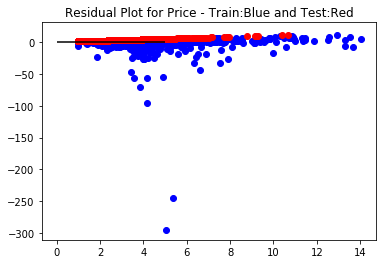

In [18]:
#Residual plot for price
plt.scatter(PricePredict_train,np.subtract(PricePredict_train,y_train.values),c='b')
plt.scatter(PricePredict_test,np.subtract(PricePredict_test,y_test.values),c='r')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Price - Train:Blue and Test:Red')